# Making a word cloud from lyrics

On 16th of July 2019 South African singer and activist [Johnny Clegg](https://www.theguardian.com/world/2019/jul/16/johnny-clegg-south-african-singer-and-activist-dies-aged-66) passed away from cancer. As my personal tribute to him I have made a wordcloud from his lyrics in his image using python. 

![image](johnnyclegg_wc.png)

### General procedure
- scrape lyrics and combine into string
- clean text and visualise words
- process the image to be used as mask
- finalise the wordcloud and save the image

## Scrape lyrics

The lyrics were obtained from [Johnny Clegg's website](https://www.johnnyclegg.com/lyrics.html) using the `request` and `BeautifulSoup` package. The page lists all of his albums with seperate links to the lyrics for each song.

In [1]:
#Packages
import requests
from bs4 import BeautifulSoup
import re

In [2]:
# load html content
response = requests.get('http://www.johnnyclegg.com/lyrics.html')
# parse html
soup = BeautifulSoup(response.content,'html.parser')

In [3]:
# extract all hyperlinks from lyrics site
a = soup.find_all('a',href=True)
href_list = [line['href'] for line in a]
href_list

['index.html',
 'scatterlings.html',
 'gallery.html',
 'tour.html',
 'biog.html',
 'lyrics.html',
 'music.html',
 'video.html',
 'agency.html',
 'links.html',
 'lyrics/human.html',
 'lyrics/human.html#gaza',
 'lyrics/human.html#calling',
 'lyrics/human.html#youbabe',
 'lyrics/human.html#asilazi',
 'lyrics/human.html#wonder',
 'lyrics/human.html#congo',
 'lyrics/human.html#hidden',
 'lyrics/human.html#thatsound',
 'lyrics/human.html#manqoba',
 'lyrics/human.html#nyembezi',
 'lyrics/human.html#magumede',
 'lyrics/onelife.html',
 'lyrics/onelife.html#1',
 'lyrics/onelife.html#2',
 'lyrics/onelife.html#3',
 'lyrics/onelife.html#4',
 'lyrics/onelife.html#5',
 'lyrics/onelife.html#6',
 'lyrics/onelife.html#7',
 'lyrics/onelife.html#8',
 'lyrics/onelife.html#9',
 'lyrics/onelife.html#10',
 'lyrics/onelife.html#11',
 'lyrics/onelife.html#12',
 'lyrics/onelife.html#13',
 'lyrics/onelife.html#14',
 'lyrics/onelife.html#15',
 'lyrics/onelife.html#16',
 'index.html',
 '#top',
 'lyrics/nws.html',
 

The desired links can easily be extracted from the list of all hyperlinks using a regex expression. 

The links to the lyrics of an album start with `lyrics/` and end in `.html`. In order to avoid loading the same content in multiple times, the song-links ending in `#No` or `#song` need to be removed from the list.

Note that the link `test/lyrics/scatterlings.htmll`, appearing at the end of the list needs to be excluded too.

In [4]:
lyrics_links = []
for href in href_list:
    match = re.findall(r'lyrics/\w+.html(?![#l])',href)
    if match:
        link = 'http://www.johnnyclegg.com/'+match[0]
        lyrics_links.append(link)

In [5]:
lyrics_links

['http://www.johnnyclegg.com/lyrics/human.html',
 'http://www.johnnyclegg.com/lyrics/onelife.html',
 'http://www.johnnyclegg.com/lyrics/nws.html',
 'http://www.johnnyclegg.com/lyrics/crocluv.html',
 'http://www.johnnyclegg.com/lyrics/hdd.html',
 'http://www.johnnyclegg.com/lyrics/scatterlings.html',
 'http://www.johnnyclegg.com/lyrics/ccbw.html',
 'http://www.johnnyclegg.com/lyrics/shadoman.html',
 'http://www.johnnyclegg.com/lyrics/afrlit.html',
 'http://www.johnnyclegg.com/lyrics/thirdworld.html']

Now we can step through the list of all links, parsing each album's website content through `BeautifulSoup` and extracting the text. Note, that in this case extracting only the body of the document leads to unexpected results. Therefore the whole document was loaded and then the header and footer removed. The lyrics are combined into one string and then saved to the file `lyrics.txt`.

In [6]:
# example of lyrics webpage
link = lyrics_links[0]
response = requests.get(link)
lyrics_soup = BeautifulSoup(response.content,'html.parser')
lyrics_text = lyrics_soup.text

In [7]:
print('First few lines:')
lyrics_text[:1500]

First few lines:


'\n\nJohnny Clegg\n\n\n\n\n<!--\nfunction MM_swapImgRestore() { //v3.0\n  var i,x,a=document.MM_sr; for(i=0;a&&i<a.length&&(x=a[i])&&x.oSrc;i++) x.src=x.oSrc;\n}\nfunction MM_preloadImages() { //v3.0\n  var d=document; if(d.images){ if(!d.MM_p) d.MM_p=new Array();\n    var i,j=d.MM_p.length,a=MM_preloadImages.arguments; for(i=0; i<a.length; i++)\n    if (a[i].indexOf("#")!=0){ d.MM_p[j]=new Image; d.MM_p[j++].src=a[i];}}\n}\n\nfunction MM_findObj(n, d) { //v4.01\n  var p,i,x;  if(!d) d=document; if((p=n.indexOf("?"))>0&&parent.frames.length) {\n    d=parent.frames[n.substring(p+1)].document; n=n.substring(0,p);}\n  if(!(x=d[n])&&d.all) x=d.all[n]; for (i=0;!x&&i<d.forms.length;i++) x=d.forms[i][n];\n  for(i=0;!x&&d.layers&&i<d.layers.length;i++) x=MM_findObj(n,d.layers[i].document);\n  if(!x && d.getElementById) x=d.getElementById(n); return x;\n}\n\nfunction MM_swapImage() { //v3.0\n  var i,j=0,x,a=MM_swapImage.arguments; document.MM_sr=new Array; for(i=0;i<(a.length-2);i+=3)\n   if (

In [8]:
print('Last few lines:')
lyrics_text[-1000:]

Last few lines:


'MEDE (Mrs.Gumede)\nBalithatha ibhulukwe lami maGumede, ibhuluwe lami\n            (they have taken my trousers Mrs. Gumede \xa0,my trousers !\n            O! liphi ? ibhulukwe lami wemaGumede, ibhulukwe lami\n            (where are they ? my trousers Mrs.Gumede, my trousers ?\nShe replies:\n            Ulele-phi izolo ?\xa0  Ubuza ibhulukwe lakho!\n            (Where did you sleep last night, think before you ask  about them?)\n\xa0\n\xa0\nBack \n\n\n\n\n \xa0\n\n\n\n\n\n\n\n\xa0\n\n\n\n\xa0\n\n\n\n\n\n          New Dates:\n\xa0\n\n» more tour dates here\n\xa0\n\xa0\n\n\n\n\n\xa0\n\n\n\n\n\n\xa0\n\xa0\n\xa0\n\n\n\n\n\n\nscatterlings club | blog | tour dates | biogs | lyrics | music | video | management | links\ncopyright © 1976-2009 Johnny Clegg / One World Music / Salt / Pixelchurch new media | all rights   reserved | all images, sound \n  recordings, video materials and other media on   johnnyclegg.com \nare copyrighted and may not be removed from the site, \nnor may   they be refer

In [9]:
all_lyrics = ''
for i,link in enumerate(lyrics_links):
    response = requests.get(link)
    lyrics_soup = BeautifulSoup(response.content,'html.parser')
    lyrics_text = lyrics_soup.text
    #remove header
    album_start =  lyrics_text.index('\xa0\n\n\n\n\n\n\n\n\n\n')
    #remove footer
    album_end = lyrics_text.index('New Dates')
    lyrics = lyrics_text[album_start:album_end]
    #remove white lines for viewing purposes
    lyrics = re.sub('\n\n\n*','\n',lyrics)
    all_lyrics += lyrics

In [10]:
#save lyrics to file for good measure
with open('lyrics.txt','w') as file:
    file.write(all_lyrics)

## Cleaning the text and visualisation

The lyrics are fairly clean, but they do contain a couple of instructions and remnants from the website layout (e.g. "repeat chorus", "Back") that should be removed. The visualisation of the text is accomplished with the `wordcloud` package, which also handles tokenisation of the text and computation of the frequency dictionary of the words.

In [11]:
#Packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [12]:
# load file back into sring
with open('lyrics.txt','r') as file:
    lyrics = file.read()

In [13]:
# cleaning the string
print('Before:')
print(lyrics[:500])
lyrics = lyrics.replace('Back','')
lyrics = re.sub('Chorus','',lyrics,flags=re.I)
# remove repeats such as (X2),(repeat) etc.
lyrics = re.sub(r'\(repeat.*\)','',lyrics)
lyrics = re.sub(r'\([Xx]{1}[1-9]+\)','',lyrics)
lyrics = re.sub(r'\([1-9]+[Xx]{1}\)','',lyrics)
# remove capitalisation
lyrics = lyrics.lower()
# note: wordcloud can handle punctuation
print('-'*60)
print('After:')
print(lyrics[:500])

Before:
 
          Human
LOVE IN THE TIME OF GAZA
            I was born  inside the rain on a day of wonder
            Deep inside my brain memories of thunder
            I grew up a refugee, my life not fixed or free
            I know the world’s not to blame
            Cos’ everybody carries my name 
CHORUS:
            Oooh! These are my Fathers’ people – (Hawu Ngitshele!  Ngitshele! - tell me! tell me!)
            Oooh! This is where the Human tree once grew
            Oooh !  We are the  ch
------------------------------------------------------------
After:
 
          human
love in the time of gaza
            i was born  inside the rain on a day of wonder
            deep inside my brain memories of thunder
            i grew up a refugee, my life not fixed or free
            i know the world’s not to blame
            cos’ everybody carries my name 
:
            oooh! these are my fathers’ people – (hawu ngitshele!  ngitshele! - tell me! tell me!)
            oooh! th

In [14]:
# instantiate WordCloud
wc = WordCloud(
	collocations=False,#if set to true creates word pairs
	background_color='white',
	max_words=None,
	).generate(lyrics)

In [15]:
# frequency dictionary of words
freq_dic = wc.words_
print(f'number of words: {len(freq_dic)}\n')
print('Top 5 words')
i=0
for key,value in freq_dic.items():
    print(f'{key}: {value:.2f}')
    i+=1
    if i == 5:
        break
    

number of words: 3040

Top 5 words
will: 1.00
day: 0.84
know: 0.73
world: 0.63
see: 0.63


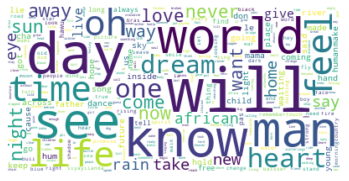

In [16]:
# visualisation
# plot wordcloud into matplotlib figure
fig,ax = plt.subplots()
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

## Image processing

In order to generate the wordcloud over an image, the image needs to be processed into an array which can be used as a mask. Black areas of the mask will be used to print words, while white areas will remain blank. The wordclod package does not work well with certain images. Best results are achieved when images are binarised to pure black and white. Image processing is performed using `PIL` and `numpy`.

In [17]:
# Packages
from PIL import Image

import numpy as np

RGB


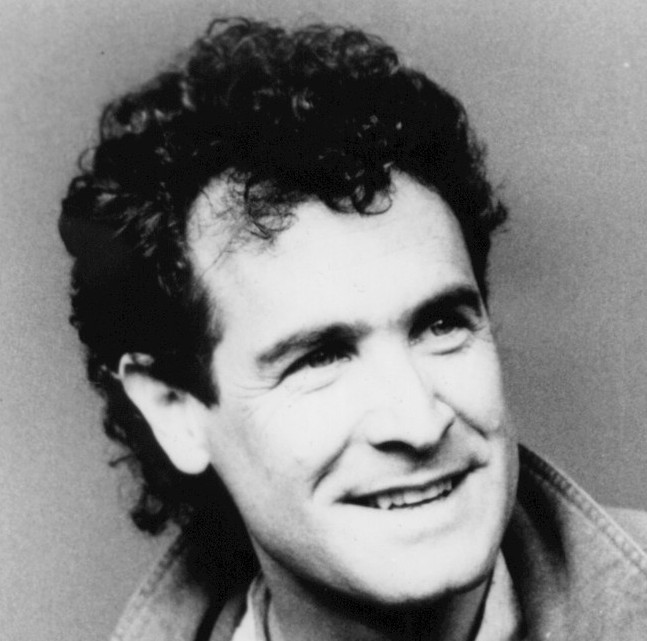

In [18]:
# load image with PIL and print mode
image_file = Image.open('johnny_mask.jpeg')
print(image_file.mode)
image_file

In [19]:
# convert image to monochrome
image_monochrome = image_file.convert('L')
print(image_monochrome.mode)

L


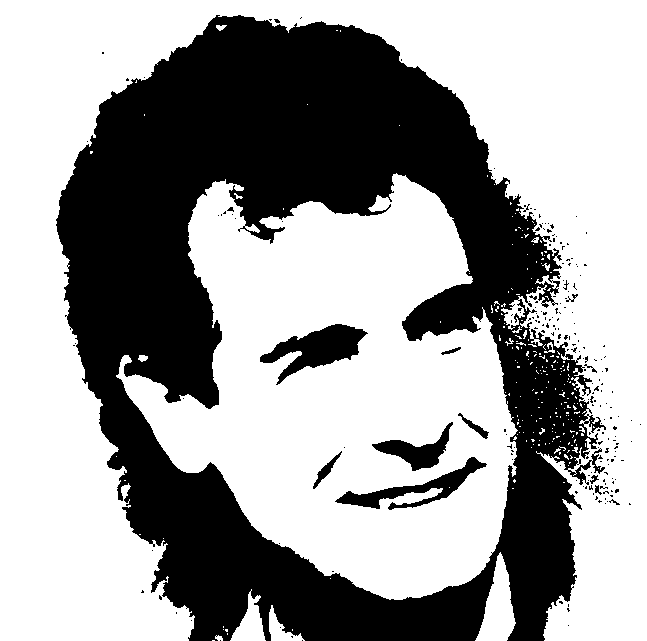

In [20]:
# transform monochrome to pure black (0) and pure white (255) image
thresh=125
binarise = lambda x : 255 if x > thresh else 0
image_binary = image_monochrome.point(binarise)
image_binary

In [21]:
# compute mask as array of image
mask_original = np.array(image_file)
mask_monochrome = np.array(image_monochrome)
mask_binary = np.array(image_binary)
print('original (RGB):')
print(mask_original[0])
print('monochrome:')
print(mask_monochrome[0][:10])
print('binary:')
print(mask_binary[0][:10])

original (RGB):
[[196 196 196]
 [192 192 192]
 [190 190 190]
 ...
 [186 186 186]
 [189 189 189]
 [192 192 192]]
monochrome:
[196 192 190 189 190 189 191 192 194 193]
binary:
[255 255 255 255 255 255 255 255 255 255]


In [22]:
# generate wordclouds with different masks
wc_original = WordCloud(
	collocations=False,#if set to true creates word pairs
	background_color='white',
    #max_words set to 100 for speed
	max_words=100,
    mask = mask_original
	).generate(lyrics)
wc_monochrome = WordCloud(
	collocations=False,#if set to true creates word pairs
	background_color='white',
	max_words=100,
    mask = mask_monochrome
	).generate(lyrics)
wc_binary = WordCloud(
	collocations=False,#if set to true creates word pairs
	background_color='white',
	max_words=100,
    mask = mask_binary
	).generate(lyrics)

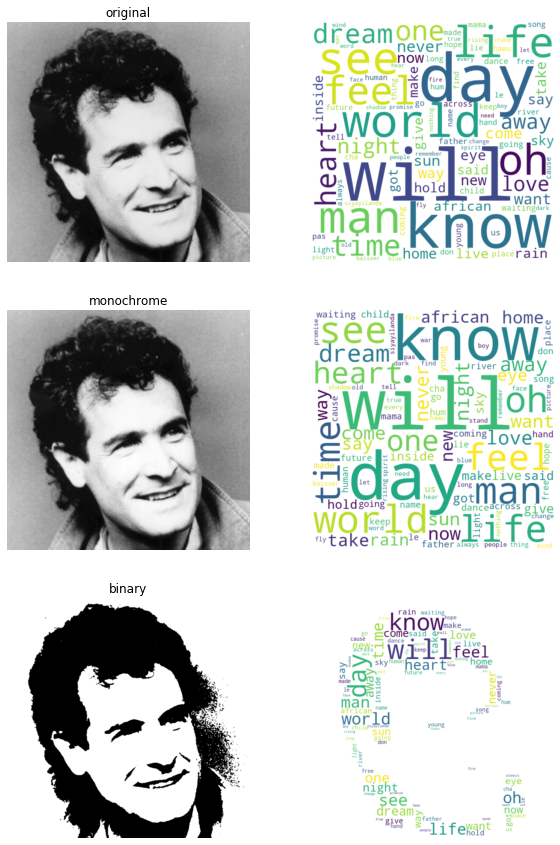

In [23]:
#vdemonstrate effect of image processing on wordcloud
fig,ax = plt.subplots(3,2,figsize= (10,15))
#plot masks
ax[0,0].imshow(mask_original,interpolation='bilinear')
ax[1,0].imshow(mask_monochrome,cmap='gray',interpolation='bilinear')
ax[2,0].imshow(mask_binary,cmap='gray',interpolation='bilinear')
#plot wordclouds
ax[0,1].imshow(wc_original,interpolation='bilinear')
ax[1,1].imshow(wc_monochrome,interpolation='bilinear')
ax[2,1].imshow(wc_binary,interpolation='bilinear')
# decorations
ax[0,0].set_title('original')
ax[1,0].set_title('monochrome')
ax[2,0].set_title('binary')
[axes.set_axis_off() for axes in ax.ravel()]
plt.show()

### A note on displaying monochrome images with plt.imshow()
When plotting arrays of images using `plt.imshow()` matplotlib uses the default colormap 'Viridis'. This means that monochrome images are displayed in yellow/purple by default. In order to display monochrome images in graysacale the colormap needs to be changed using `cmap="gray"` or the array needs to be reshaped to reflect the RGB values, as shown below.

In [24]:
print('Original array shape (RGB): ',mask_original.shape)
print('Binary array shape (L): ',mask_binary.shape)
# reshape array
binary_RGB = []
for _ in mask_binary:
    RGB = []
    for L in _:
        RGB.append([L,L,L])
    binary_RGB.append(np.array(RGB))
binary_RGB = np.array(binary_RGB)
print('Reshaped binary array (RGB): ',binary_RGB.shape)

Original array shape (RGB):  (641, 647, 3)
Binary array shape (L):  (641, 647)
Reshaped binary array (RGB):  (641, 647, 3)


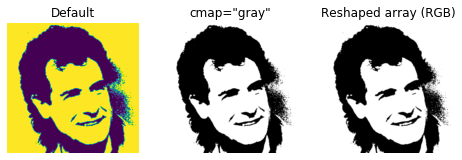

In [25]:
fig,ax = plt.subplots(1,3,figsize=(8,20))
ax[0].imshow(mask_binary,interpolation='bilinear')
ax[1].imshow(mask_binary,cmap='gray',interpolation='bilinear')
ax[2].imshow(binary_RGB,interpolation='bilinear')
#decorations
ax[0].set_title('Default')
ax[1].set_title('cmap="gray"')
ax[2].set_title('Reshaped array (RGB)')
[axes.set_axis_off() for axes in ax.ravel()]
plt.show()

## Finalising the wordcloud

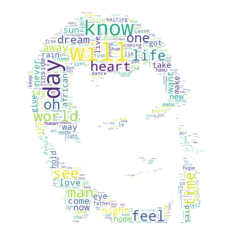

In [26]:
# use array of binary image as mask
mask = mask_binary
# instantiate WordCloud
wc = WordCloud(
	collocations=False,#if set to true creates word pairs
	background_color='white',
	max_words=None,
    mask=mask,
	).generate(lyrics)
fig,ax = plt.subplots()
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

A couple of improvements can be made to make the image visually more appealing.

Words that appear very frequently are dominating the wordcloud and making it more difficult to see less frequent words. Therefore frequent words are removed from the cloud and a maximum font size is set.

The default colormap for the wordcloud is the matplotlib colormap 'viridis'. However, the image becomes more clear when a single color is used for the words. Wordcloud accepts any [matplotlib colors](https://matplotlib.org/examples/color/named_colors.html).

In [27]:
# remove frequent words
rm_list = ['will','day','man','know']
for word in rm_list:
     lyrics = lyrics.replace(word,'')

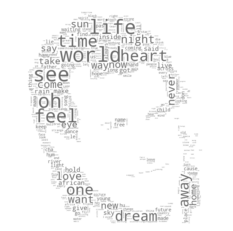

In [28]:
wc = WordCloud(
	collocations=False,#if set to true creates word pairs
	background_color='white',
	max_words=None,
    max_font_size=60,
    color_func=lambda *args, **kwargs: "dimgray",
    mask=mask,
	).generate(lyrics)
fig,ax = plt.subplots()
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
#saving the wordcloud
wc.to_file('johnnyclegg_wc.png')

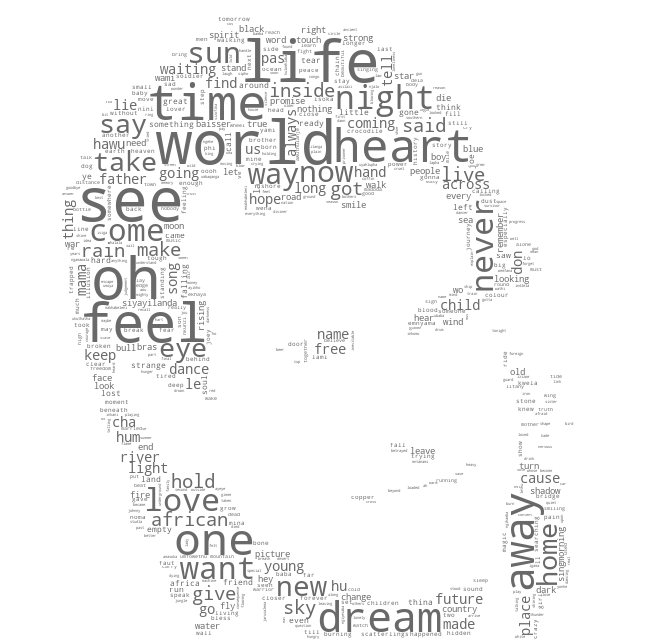

In [30]:
Image.open('johnnyclegg_wc.png')